<a href="https://colab.research.google.com/github/sara7860/TSF-GRIPMARCH22/blob/main/prediction_using_supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation: Data Science and Business Analytics**
## **Task 1: Prediction Using Supervised ML**

##**Author: Sara Kulkarni**

##**Batch: March 2022**

In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
df= pd.read_csv("https://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


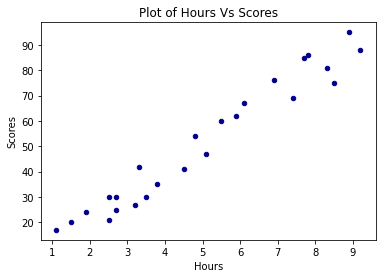

In [3]:
df.plot(kind='scatter', x='Hours', y='Scores', color='darkblue')
plt.title('Plot of Hours Vs Scores')
plt.show()

In [4]:
#dividing the data into sets
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

In [5]:
#split the dataset into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)
print('Train set:', X_train.shape, Y_train.shape)
print('Test set:', X_test.shape, Y_test.shape)

Train set: (20, 1) (20,)
Test set: (5, 1) (5,)


In [6]:
#train the model 
regr= linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression()

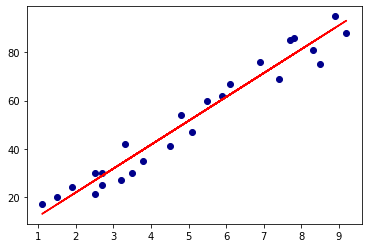

In [7]:
#plot the regression line
line = regr.coef_*X+regr.intercept_
plt.scatter(X,Y, color='darkblue')
plt.plot(X,line,'-r')
plt.show()

In [8]:
#predict the scores for test data 
yhat = regr.predict(X_test)
yhat

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [9]:
#comapring the actual scores vs predicted scores
df1 = pd.DataFrame({'Actual-Scores':Y_test,'Predicted-Scores':yhat})
df1

,Actual-Scores,Predicted-Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [10]:
#What will be the predicted score if a student studies for 9.25 hrs/day?
hrs= np.array(9.25)
hrs=hrs.reshape(-1,1)
pred= regr.predict(hrs)
print("No. of Hours Studied = {}".format(hrs[0][0]))
print("Predicted Score = {}".format(pred[0]))

No. of Hours Studied = 9.25
Predicted Score = 93.69173248737539


In [11]:
#Mean Absolute Error
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(Y_test, yhat))

Mean absolute error: 4.18


In [12]:
#Residual Sum of Sqaures 
print("Residual sum of squares (MSE): %.2f" % np.mean((Y_test - yhat)**2))

Residual sum of squares (MSE): 21.60


In [13]:
#R2-score
print("R2-score: %.2f" % r2_score(Y_test,yhat))

R2-score: 0.95
